In [1]:
import pandas as pd

from utils import *

# Principal Component Analysis

PCA是在数据集中找到“主成分”或最大方差方向的线性变换。可以用于降维。

In [2]:
data = loadmat('data/ex7data1.mat')
data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X'])

In [3]:
data['X']

array([[3.38156267, 3.38911268],
       [4.52787538, 5.8541781 ],
       [2.65568187, 4.41199472],
       [2.76523467, 3.71541365],
       [2.84656011, 4.17550645],
       [3.89067196, 6.48838087],
       [3.47580524, 3.63284876],
       [5.91129845, 6.68076853],
       [3.92889397, 5.09844661],
       [4.56183537, 5.62329929],
       [4.57407171, 5.39765069],
       [4.37173356, 5.46116549],
       [4.19169388, 4.95469359],
       [5.24408518, 4.66148767],
       [2.8358402 , 3.76801716],
       [5.63526969, 6.31211438],
       [4.68632968, 5.6652411 ],
       [2.85051337, 4.62645627],
       [5.1101573 , 7.36319662],
       [5.18256377, 4.64650909],
       [5.70732809, 6.68103995],
       [3.57968458, 4.80278074],
       [5.63937773, 6.12043594],
       [4.26346851, 4.68942896],
       [2.53651693, 3.88449078],
       [3.22382902, 4.94255585],
       [4.92948801, 5.95501971],
       [5.79295774, 5.10839305],
       [2.81684824, 4.81895769],
       [3.88882414, 5.10036564],
       [3.

In [4]:
X = data['X']
X.shape

(50, 2)

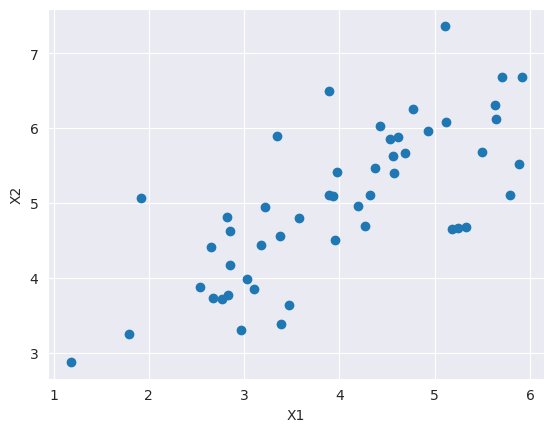

In [5]:
fig, ax = plt.subplots()
ax.scatter(X[:, 0], X[:, 1])
ax.set_xlabel('X1')
ax.set_ylabel('X2')
plt.show()

PAC的算法相当简单，在确保数据被归一化后，输出仅仅是原始数据的协方差矩阵的奇异值分解。

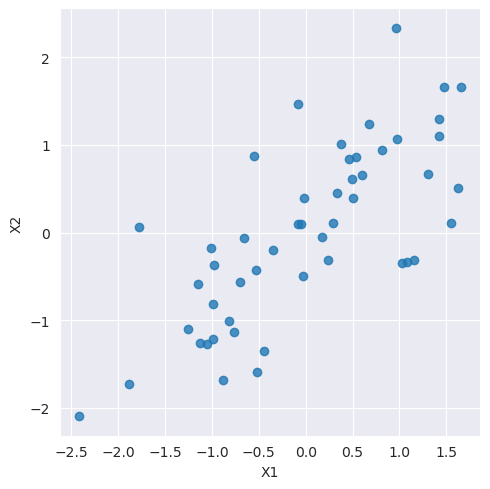

In [6]:
X_norm = (X - X.mean(axis=0)) / X.std(axis=0)
sns.lmplot(x = 'X1', y ='X2', data=pd.DataFrame(X_norm, columns=['X1', 'X2']), fit_reg=False)
plt.show()

# implement PCA

Covariance Matrix:
$$
\sum = \frac{1}{m}X^TX
$$

In [7]:
def pca(X):
    """
    http://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.svd.html
    Args:
        X ndarray(m, n)
    Returns:
        U ndarray(n, n): principle components
    """
    # normalization
    X = (X - X.mean(axis=0)) / X.std(axis=0)  # 按列标准化

    # compute the covariance matrix
    # cov = (X.T @ X) / X.shape[0]
    cov = np.cov(X, rowvar=False)
    # perform SVD
    U, S, V = np.linalg.svd(cov)

    return U, S, V

In [8]:
U, S, V = pca(X)
U, S, V

(array([[-0.70710678, -0.70710678],
        [-0.70710678,  0.70710678]]),
 array([1.77094936, 0.26986696]),
 array([[-0.70710678, -0.70710678],
        [-0.70710678,  0.70710678]]))

## Project Data
现在我们有主成分（矩阵U），我们可以用这些来将原始数据投影到一个较低维的空间中。 对于这个任务，我们将实现一个计算投影并且仅选择顶部K个分量的函数，有效地减少了维数。

In [9]:
def project_data(X, U, k):
    return X @ U[:, :k]

In [18]:
Z = project_data(X_norm, U, 1)
Z[:10]

array([[ 1.49631261],
       [-0.92218067],
       [ 1.22439232],
       [ 1.64386173],
       [ 1.2732206 ],
       [-0.97681976],
       [ 1.26881187],
       [-2.34148278],
       [-0.02999141],
       [-0.78171789]])

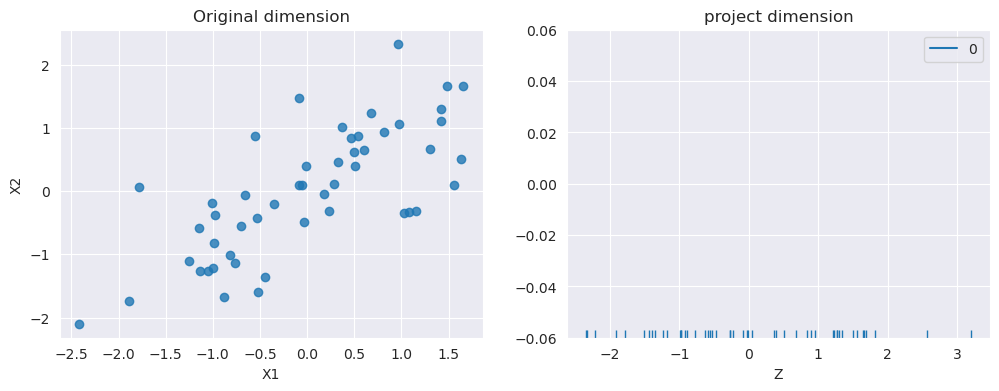

In [19]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 4))
sns.regplot(x='X1', y='X2', data=pd.DataFrame(X_norm, columns=['X1', 'X2']),
            fit_reg=False, ax = ax1)
ax1.set_title('Original dimension')

sns.rugplot(Z, ax=ax2)
ax2.set_xlabel('Z')
ax2.set_title('project dimension')
plt.show()

## Recover Data

In [20]:
def recover_data(Z, U, k):
    return Z @ U[:, :k].T

In [21]:
X_recovered = recover_data(Z, U, 1)
X_recovered

array([[-1.05805279, -1.05805279],
       [ 0.65208021,  0.65208021],
       [-0.86577611, -0.86577611],
       [-1.16238578, -1.16238578],
       [-0.90030292, -0.90030292],
       [ 0.69071588,  0.69071588],
       [-0.89718548, -0.89718548],
       [ 1.65567835,  1.65567835],
       [ 0.02120713,  0.02120713],
       [ 0.55275802,  0.55275802],
       [ 0.44666359,  0.44666359],
       [ 0.39088959,  0.39088959],
       [ 0.06341447,  0.06341447],
       [ 0.371835  ,  0.371835  ],
       [-1.10602429, -1.10602429],
       [ 1.35488989,  1.35488989],
       [ 0.62706042,  0.62706042],
       [-0.67604623, -0.67604623],
       [ 1.64752825,  1.64752825],
       [ 0.33795364,  0.33795364],
       [ 1.56798945,  1.56798945],
       [-0.27506901, -0.27506901],
       [ 1.26206077,  1.26206077],
       [-0.03659622, -0.03659622],
       [-1.17742041, -1.17742041],
       [-0.35930621, -0.35930621],
       [ 0.874769  ,  0.874769  ],
       [ 0.82871979,  0.82871979],
       [-0.59553725,

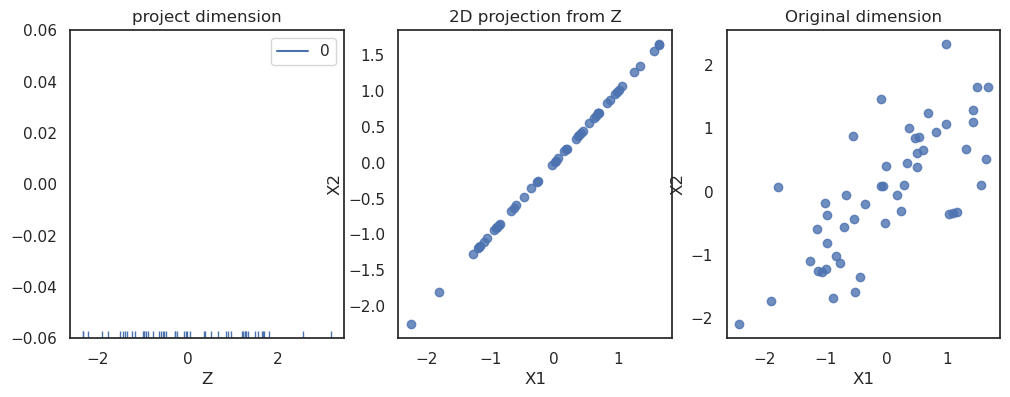

In [27]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(12,4))
sns.rugplot(Z, ax=ax1)
ax1.set_title('project dimension')
ax1.set_xlabel('Z')

sns.regplot(x='X1', y='X2', data=pd.DataFrame(X_recovered, columns=['X1', 'X2']),
           fit_reg=False, ax=ax2)
ax2.set_title('2D projection from Z')

sns.regplot(x='X1', y='X2', data=pd.DataFrame(X_norm, columns=['X1', 'X2']),
           fit_reg=False, ax=ax3)
ax3.set_title('Original dimension')

plt.show()

In [29]:
X_recovered[0], X_norm[0]

(array([-1.05805279, -1.05805279]), array([-0.52331306, -1.59279252]))

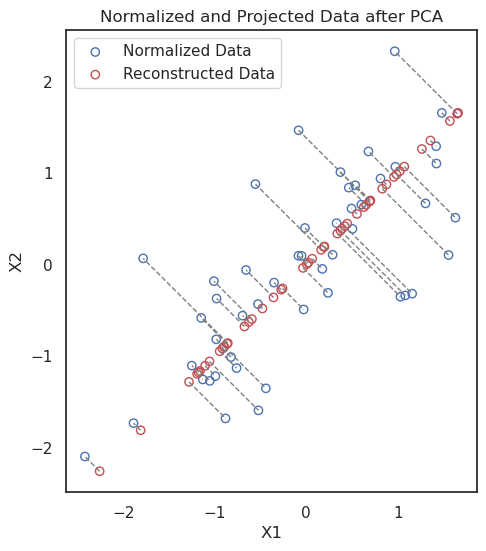

In [32]:
# 假设 X_norm 和 X_recovered 已定义
fig, ax = plt.subplots(figsize=(6, 6))
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_title('Normalized and Projected Data after PCA')

# 绘制散点
ax.scatter(X_norm[:, 0], X_norm[:, 1], c='none', edgecolors='b', label='Normalized Data')
ax.scatter(X_recovered[:, 0], X_recovered[:, 1], c='none', edgecolors='r', label='Reconstructed Data')

# 绘制连接线
ax.plot(
    np.vstack([X_recovered[:, 0], X_norm[:, 0]]),  # X 坐标 (2 x N)
    np.vstack([X_recovered[:, 1], X_norm[:, 1]]),  # Y 坐标 (2 x N)
    '--',
    color='gray',
    lw=1
)

# 调整图形
ax.legend()
ax.set_aspect('equal')  # 保持坐标轴比例一致
plt.show()

# PCA - face data

## Load Data

In [33]:
faces = loadmat('data/ex7faces.mat')
X= faces['X']
X.shape

(5000, 1024)

In [36]:
def plot_n_image(X, n):
    """ plot first n images
    n has to be a square number
    """
    pic_size = int(np.sqrt(X.shape[1]))
    grid_size = int(np.sqrt(n))

    images = X[:n, :]

    fig, ax_array = plt.subplots(nrows=grid_size, ncols=grid_size,
                                    sharey=True, sharex=True, figsize=(8, 8))

    for r in range(grid_size):
        for c in range(grid_size):
            ax_array[r, c].imshow(images[grid_size * r + c].reshape((pic_size, pic_size)))
            plt.xticks(np.array([]))
            plt.yticks(np.array([]))


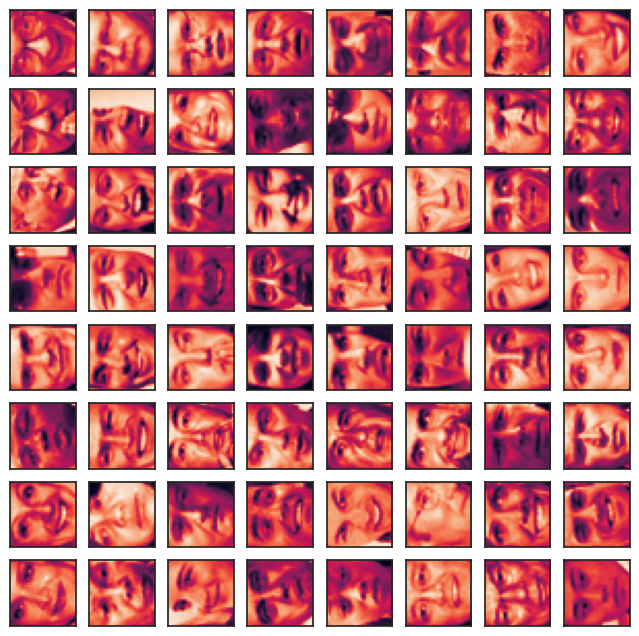

In [37]:
plot_n_image(X, n=64)

## Run PAC

In [38]:
U, S, V = pca(X)
U.shape

(1024, 1024)

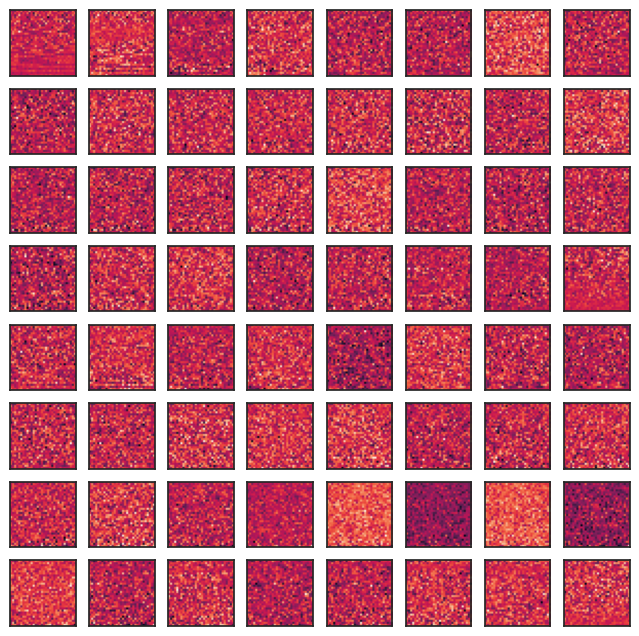

In [39]:
plot_n_image(U, n=64)

## Reduce dimension to K = 100

In [40]:
Z = project_data(X, U, 100)
Z.shape

(5000, 100)

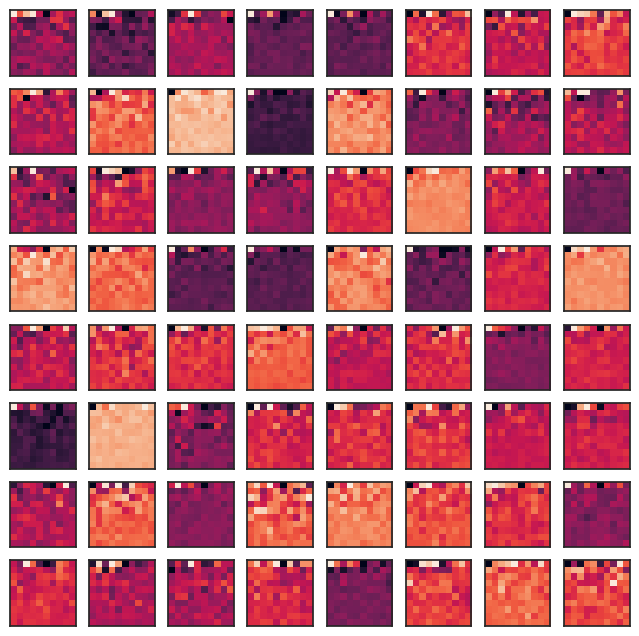

In [41]:
plot_n_image(Z, n=64)

## Recover Data from k=100

lost some details, but they are strikingly similar, and only use 100 feature.

In [43]:
X_recovered = recover_data(Z, U, 100)
X_recovered.shape

(5000, 1024)

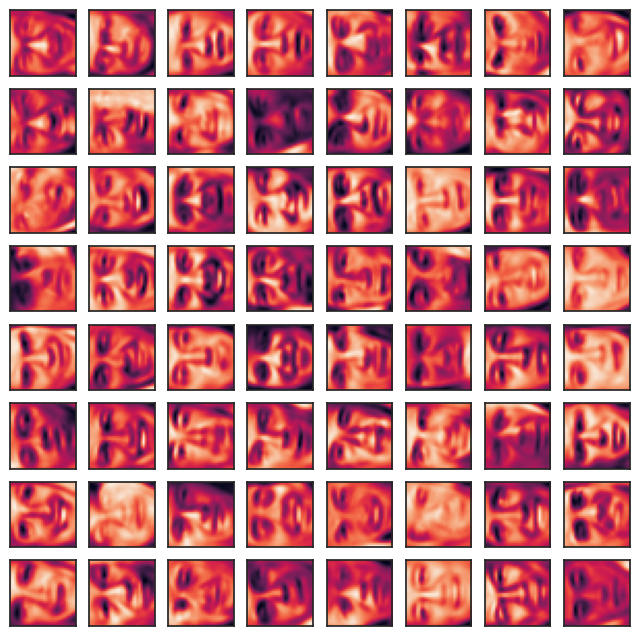

In [45]:
plot_n_image(X_recovered, n=64)

## sklearn PCA

[sklearn.decomposition.PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)

In [46]:
from sklearn.decomposition import PCA as sk_PCA

pca = sk_PCA(n_components=100)
Z = pca.fit_transform(X)
Z.shape

(5000, 100)

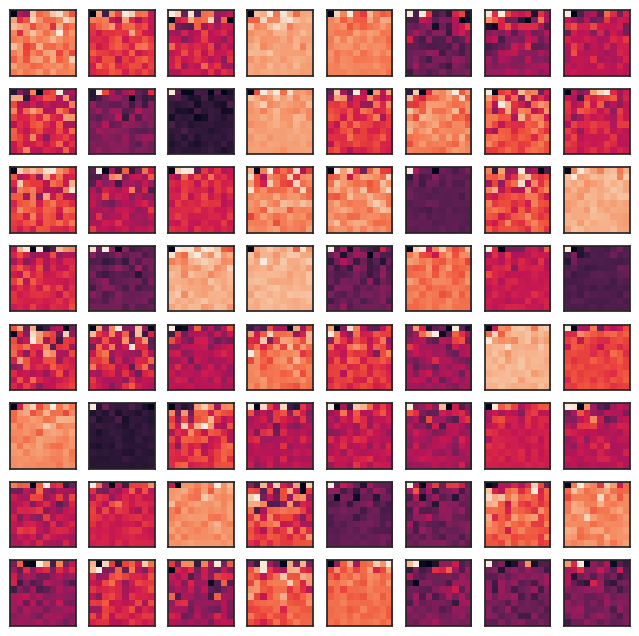

In [47]:
plot_n_image(Z, 64)

In [48]:
X_recover = pca.inverse_transform(Z)
X_recover.shape

(5000, 1024)

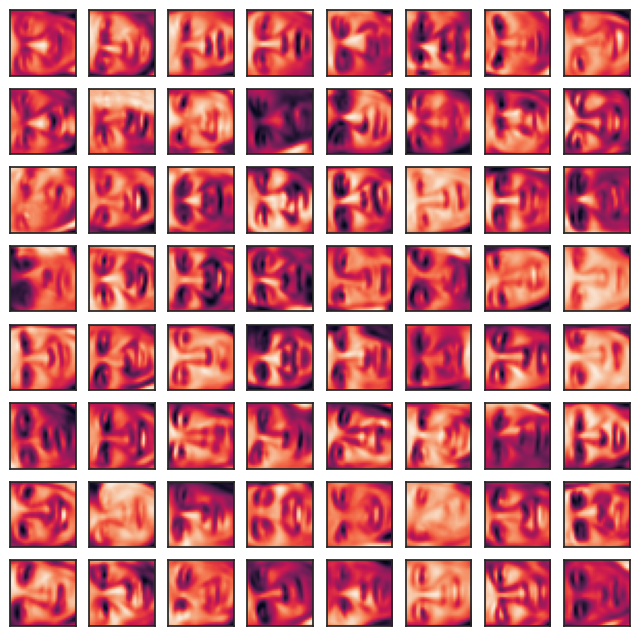

In [49]:
plot_n_image(X_recover, n=64)